<a href="https://www.kaggle.com/code/priti19mhatre/eda-on-deluxe-online-retail-store?scriptVersionId=139524488" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**Deluxe is an online retailer based in UK that deals with the wide range of products in the following categories like Clothing,Games,Appliances etc.
Major aim here is to clean the data and perform basic EDA on this Dataset in order to find insight from the sales data.
Which can help to Boost sales by identifying the highest selling product categories and countries which sells the product most,thereby facilitating inventory planning to meet the demands.**

**to achive that we will first need to
1.load the dataset..
2.clean the dataset..
3.transform the data if necessary..
4.analysis the data.. 
5.share the insights..
6.To make the data driven decisions using insights..**



# Loading the Data set

In [1]:


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/online-store-sales-data/Sales-Export_2019-2020.csv


# Importing necessary libraries

**Using matplotlib and seaborn for making the Visualizations.**

**Importing pandas as it provide high performance, fast, easy-to-use data structures and data analysis tools for manipulating numeric data.**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**Using 'encoding' to prevent UnicodeDecodeError when Reading CSV file in Pandas with Python.**

In [3]:
df=pd.read_csv("/kaggle/input/online-store-sales-data/Sales-Export_2019-2020.csv", encoding = "unicode_escape")

**Understanding the loaded data.**

In [4]:
df

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
0,Sweden,"17,524.02",14122.61,2/12/2020,Books,Goldner-Dibbert,Maxie Marrow,Madelon Bront,Mobile,70-0511466
1,Finland,"116,563.40",92807.78,9/26/2019,Games,Hilll-Vandervort,Hube Corey,Wat Bowkley,Mobile,28-6585323
2,Portugal,"296,465.56",257480.34,7/11/2019,Clothing,Larkin-Collier,Celine Tumasian,Smitty Culverhouse,PC,58-7703341
3,Portugal,"74,532.02",59752.32,4/2/2020,Beauty,Hessel-Stiedemann,Celine Tumasian,Aurelie Wren,PC,14-6700183
4,Spain,"178,763.42",146621.76,12/22/2019,Games,Johns and Sons,Emalia Dinse,Bertha Walbrook,Tablet,15-8765160
...,...,...,...,...,...,...,...,...,...,...
995,France,"46,296.26",40319.41,5/15/2020,Games,Wisoky Inc,Othello Bowes,Amelina Piscopiello,Tablet,77-3489084
996,Belgium,"118,061.05",101131.10,7/2/2020,Appliances,Johns and Sons,Lambert Norheny,Collin Mackness,Mobile,59-2117058
997,Finland,"74,480.56",60023.88,3/6/2020,Clothing,Homenick-Marvin,Hube Corey,Wat Bowkley,PC,31-1849120
998,Spain,"87,205.01",69171.01,6/18/2020,Games,Johns and Sons,Emalia Dinse,Manuel Goudie,Tablet,45-3085595


**Checking the shape and dimensions of the dataset.**

In [5]:
df.shape

(1000, 10)

**Checking the first 10 rows of the dataframe content.**

In [6]:
df.head(10)

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
0,Sweden,"17,524.02",14122.61,2/12/2020,Books,Goldner-Dibbert,Maxie Marrow,Madelon Bront,Mobile,70-0511466
1,Finland,"116,563.40",92807.78,9/26/2019,Games,Hilll-Vandervort,Hube Corey,Wat Bowkley,Mobile,28-6585323
2,Portugal,"296,465.56",257480.34,7/11/2019,Clothing,Larkin-Collier,Celine Tumasian,Smitty Culverhouse,PC,58-7703341
3,Portugal,"74,532.02",59752.32,4/2/2020,Beauty,Hessel-Stiedemann,Celine Tumasian,Aurelie Wren,PC,14-6700183
4,Spain,"178,763.42",146621.76,12/22/2019,Games,Johns and Sons,Emalia Dinse,Bertha Walbrook,Tablet,15-8765160
5,Spain,"84,900.24",73701.90,7/14/2020,Clothing,"Farrell, Swaniawski and Crist",Emalia Dinse,Perri Aldersley,PC,60-6998932
6,Portugal,"71,620.08",62245.01,2/5/2019,Books,Schoen-Keeling,Celine Tumasian,Smitty Culverhouse,PC,69-6259390
7,UK,"156,585.22",126599.15,8/30/2020,Accessories,"Hermiston, Simonis and Wisoky",Jessamine Apark,Winny Agnolo,PC,64-5761908
8,Portugal,"78,461.13",63537.82,5/10/2020,Appliances,Hessel-Stiedemann,Celine Tumasian,Smitty Culverhouse,Mobile,91-4126746
9,France,"64,827.80",56043.63,1/20/2019,Appliances,Gislason-Stanton,Othello Bowes,Maighdiln Upcraft,PC,62-3312495


# Cleaning and preparing the Data for analysis

**Using info() as it prints the information or summary of the Dataframe. It prints the various information of the Dataframe such as index type, dtype, columns, non-values and memory usage.**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            1000 non-null   object 
 1    order_value_EUR   1000 non-null   object 
 2    cost              1000 non-null   float64
 3   date               1000 non-null   object 
 4   category           1000 non-null   object 
 5   customer_name      1000 non-null   object 
 6   sales_manager      1000 non-null   object 
 7   sales_rep          1000 non-null   object 
 8   device_type        1000 non-null   object 
 9   order_id           1000 non-null   object 
dtypes: float64(1), object(9)
memory usage: 78.2+ KB


**Using dataframe.isnull() to check if there are any missing values in our data. It will return True for missing components and False for non-missing cells.**

In [8]:
pd.isnull(df).sum()

country              0
 order_value_EUR     0
 cost                0
date                 0
category             0
customer_name        0
sales_manager        0
sales_rep            0
device_type          0
order_id             0
dtype: int64

**No null values found in the Dataframe.**

**Checking the column names to determine the need for further conversion or changes required.**

In [9]:
df.columns

Index(['country', ' order_value_EUR ', ' cost ', 'date', 'category',
       'customer_name', 'sales_manager', 'sales_rep', 'device_type',
       'order_id'],
      dtype='object')

**As we can see column names consist of whitespaces.**

**First, Naming columns in standardize form. using str.upper() to convert columns names from lower case to uppercase**

In [10]:
df.columns = df.columns.str.upper()

**Checking the results.**

In [11]:
df.columns

Index(['COUNTRY', ' ORDER_VALUE_EUR ', ' COST ', 'DATE', 'CATEGORY',
       'CUSTOMER_NAME', 'SALES_MANAGER', 'SALES_REP', 'DEVICE_TYPE',
       'ORDER_ID'],
      dtype='object')

**Column names are sucessfully converted from lowercase to uppercase.**

**Using string strip() method to Remove spaces at the beginning and at the end of the column names.**

In [12]:
df.columns = df.columns.str.strip()

In [13]:
df.columns

Index(['COUNTRY', 'ORDER_VALUE_EUR', 'COST', 'DATE', 'CATEGORY',
       'CUSTOMER_NAME', 'SALES_MANAGER', 'SALES_REP', 'DEVICE_TYPE',
       'ORDER_ID'],
      dtype='object')

**Changing the column 'COST' data type from float to integer.**

In [14]:
df["COST"] = df ["COST"]. astype("int")

In [15]:
df["COST"].dtypes

dtype('int64')

# Changing the data type of date

In [16]:
from datetime import datetime

In [17]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [18]:
df["DATE"].dtypes

dtype('<M8[ns]')

In [19]:
 np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')

True

Verifying if all the Data is in correct form or not.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   COUNTRY          1000 non-null   object        
 1   ORDER_VALUE_EUR  1000 non-null   object        
 2   COST             1000 non-null   int64         
 3   DATE             1000 non-null   datetime64[ns]
 4   CATEGORY         1000 non-null   object        
 5   CUSTOMER_NAME    1000 non-null   object        
 6   SALES_MANAGER    1000 non-null   object        
 7   SALES_REP        1000 non-null   object        
 8   DEVICE_TYPE      1000 non-null   object        
 9   ORDER_ID         1000 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 78.2+ KB


Using describe() to check the descripton of 'COST' column

In [21]:
df[["COST"]].describe()

,COST
count,1000.000000
mean,94368.819000
std,51540.027366
min,12113.000000
25%,54247.000000
50%,87094.500000
75%,125570.750000
max,304701.000000


In [22]:
df

,COUNTRY,ORDER_VALUE_EUR,COST,DATE,CATEGORY,CUSTOMER_NAME,SALES_MANAGER,SALES_REP,DEVICE_TYPE,ORDER_ID
0,Sweden,"17,524.02",14122,2020-02-12,Books,Goldner-Dibbert,Maxie Marrow,Madelon Bront,Mobile,70-0511466
1,Finland,"116,563.40",92807,2019-09-26,Games,Hilll-Vandervort,Hube Corey,Wat Bowkley,Mobile,28-6585323
2,Portugal,"296,465.56",257480,2019-07-11,Clothing,Larkin-Collier,Celine Tumasian,Smitty Culverhouse,PC,58-7703341
3,Portugal,"74,532.02",59752,2020-04-02,Beauty,Hessel-Stiedemann,Celine Tumasian,Aurelie Wren,PC,14-6700183
4,Spain,"178,763.42",146621,2019-12-22,Games,Johns and Sons,Emalia Dinse,Bertha Walbrook,Tablet,15-8765160
...,...,...,...,...,...,...,...,...,...,...
995,France,"46,296.26",40319,2020-05-15,Games,Wisoky Inc,Othello Bowes,Amelina Piscopiello,Tablet,77-3489084
996,Belgium,"118,061.05",101131,2020-07-02,Appliances,Johns and Sons,Lambert Norheny,Collin Mackness,Mobile,59-2117058
997,Finland,"74,480.56",60023,2020-03-06,Clothing,Homenick-Marvin,Hube Corey,Wat Bowkley,PC,31-1849120
998,Spain,"87,205.01",69171,2020-06-18,Games,Johns and Sons,Emalia Dinse,Manuel Goudie,Tablet,45-3085595


# Exploratory Data Analysis (EDA)

# *Based on categories*

In [23]:
df.CATEGORY.unique()

array(['Books', 'Games', 'Clothing', 'Beauty', 'Accessories',
       'Appliances', 'Smartphones', 'Outdoors', 'Electronics', 'Other'],
      dtype=object)

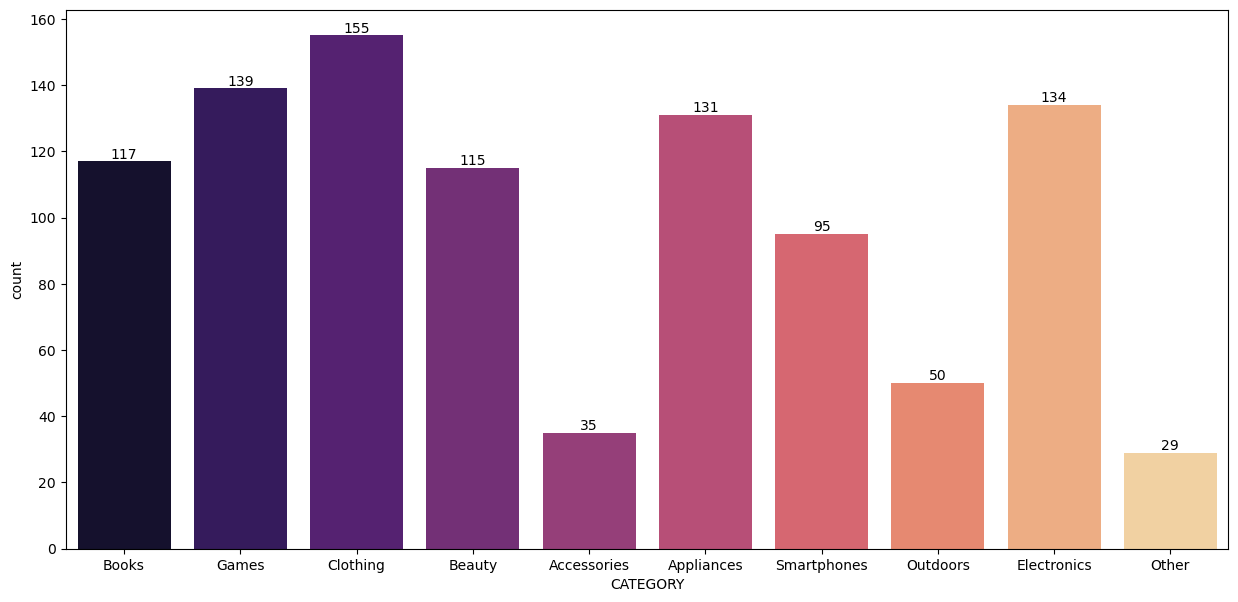

In [24]:
plt.figure(figsize=(15,7))
ax = sns.countplot(x = "CATEGORY", data = df,palette = 'magma')
for bars in ax.containers:
    ax.bar_label(bars)

**Based on the above-mentioned graphs, we can say that customer buy more items from Clothing,Games and Electronics.**

In [25]:
COST_BY_CATEGORY = df.groupby(["CATEGORY"], as_index = False)["COST"].sum().sort_values(by = "COST", ascending = False)

In [26]:
COST_BY_CATEGORY

,CATEGORY,COST
4,Clothing,14719663
6,Games,12761759
1,Appliances,12604728
5,Electronics,12080883
3,Books,10954008
2,Beauty,10450577
9,Smartphones,9280959
8,Outdoors,4882290
0,Accessories,3920017
7,Other,2713935


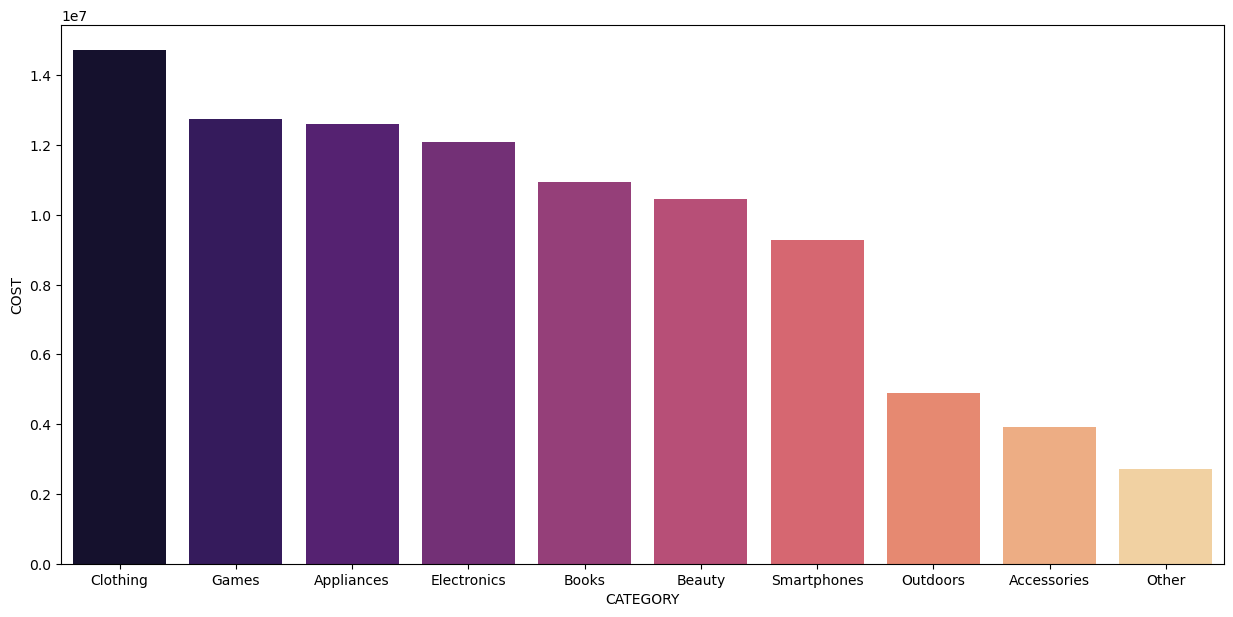

In [27]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x = "CATEGORY", y = "COST", data = COST_BY_CATEGORY,palette = 'magma')

**Based on the above-mentioned graphs, we can say that items from Clothing,Gaming and Appliances have high sale as well as costs more.**

# *Based on Country*

In [28]:
df.COUNTRY.unique()

array(['Sweden', 'Finland', 'Portugal', 'Spain', 'UK', 'France',
       'Netherlands', 'Belgium', 'Bulgaria', 'Luxembourg', 'Italy',
       'Ireland', 'Germany', 'Denmark', 'Austria'], dtype=object)

In [29]:
SALES_CONT = df.groupby(["COUNTRY"], as_index = False) ["COST"].sum().sort_values(by = "COST", ascending = False)
SALES_CONT

,COUNTRY,COST
11,Portugal,23126139
5,France,21565558
13,Sweden,16343598
14,UK,10063515
4,Finland,4648726
7,Ireland,4122953
2,Bulgaria,2876726
10,Netherlands,2699082
9,Luxembourg,2430972
6,Germany,2328079


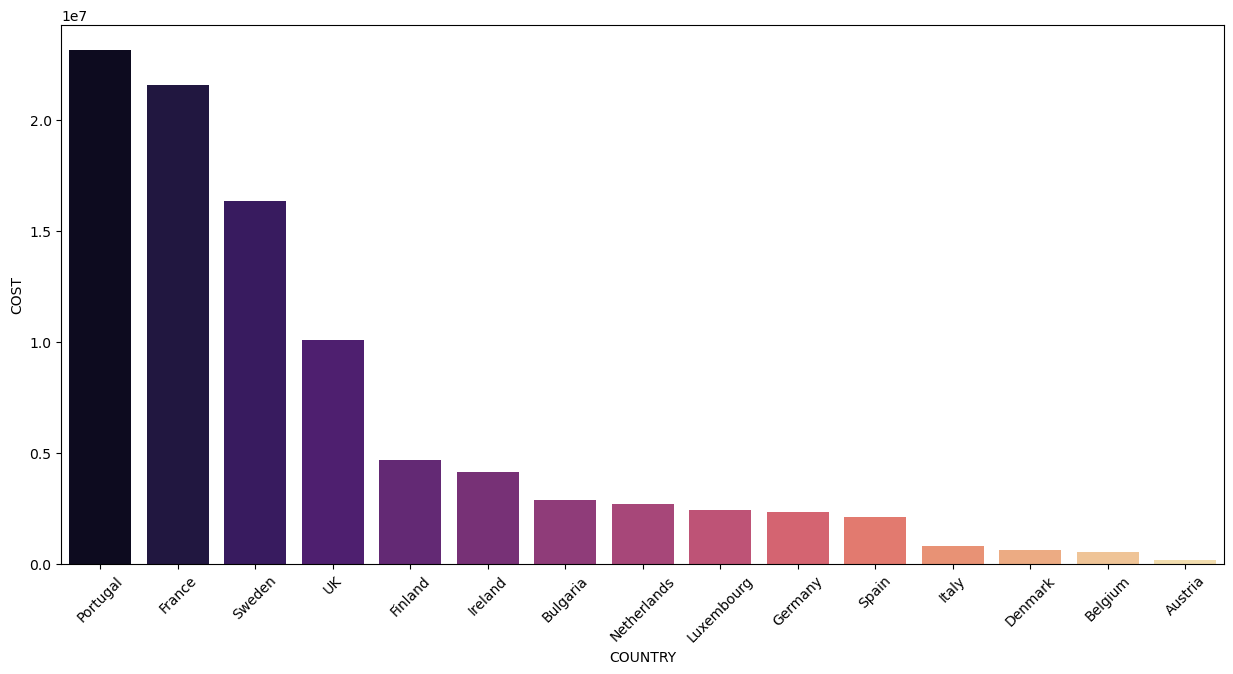

In [30]:
plt.figure(figsize=(15,7))
sc = sns.barplot(x = "COUNTRY",y = "COST", data = SALES_CONT,palette = 'magma')
plt.xticks(rotation=45)
plt.show()

**Based on above mentioned graph,we can say that in Portugal maximum items were sold where as in Austria minimum items were sold.**

# *Based on Device*

In [31]:
DEVICE_USED = df.groupby(["DEVICE_TYPE"], as_index = False) ["COST"].sum().sort_values(by = "COST", ascending = False)

In [32]:
DEVICE_USED

,DEVICE_TYPE,COST
1,PC,74558599
0,Mobile,12894611
2,Tablet,6915609


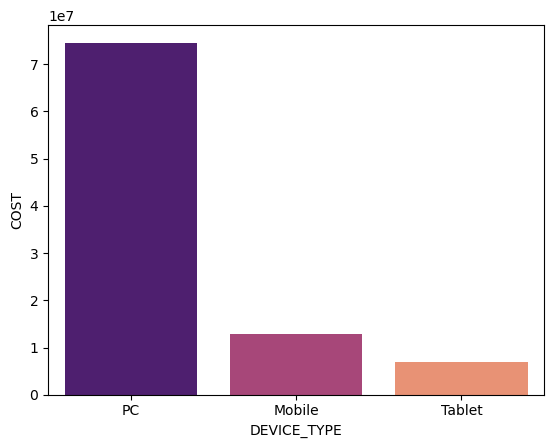

In [33]:
du = sns.barplot(x = "DEVICE_TYPE", y = "COST", data = DEVICE_USED ,palette = 'magma')

**Based on above mentioned graph,we can say that maximum customers use PC to access the online store or to place the orders.**

# Conclusion

**Maximum number of items sold in Portugal lies in Clothing, Gaming and Appliances category and maximum number of customers use PC to access the online store or to place the orders.** 

**Learnings: Executed basic data cleaning and manipulation procedures. Conducted exploratory data analysis (EDA) utilizing the pandas, matplotlib and seaborn libraries to find the insights.**